<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/PROJECT2/P2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt


In [ ]:
!gdown 1PnHCOtN9UaydInJw5WWq2uOwtg1A_POa

Downloading...
From: https://drive.google.com/uc?id=1PnHCOtN9UaydInJw5WWq2uOwtg1A_POa
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 38.2MB/s]


In [ ]:
datasets = pd.read_csv('/content/Perceptron.csv')
print(datasets.shape)
datasets

(400, 3)


,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0
...,...,...,...
395,0.574634,0.782211,-1.0
396,-1.413307,-0.673049,1.0
397,-0.465114,-1.290830,1.0
398,1.522055,0.948007,-1.0


(400, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

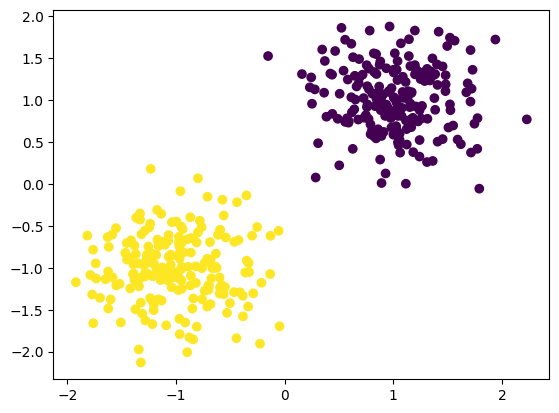

In [ ]:
X = datasets[['x1','x2']]
y = datasets['y']
a = datasets['x1']
b = datasets['x2']
plt.scatter(a, b, c=y)
print(X.shape)
plt.show


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

clf = Perceptron()

clf.fit(X_train, y_train)

Perceptron()

نتیجه قایده  پرسپترون

In [ ]:
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Accuracy on train set: {train_accuracy}")
print(f"Accuracy on test set: {test_accuracy}")

Accuracy on train set: 1.0
Accuracy on test set: 1.0


رسم با تابع آماده

<ipython-input-66-893ba84d85fe>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plot_decision_regions(X_test.values, y_test.values.astype(np.int), clf=clf, legend=2)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


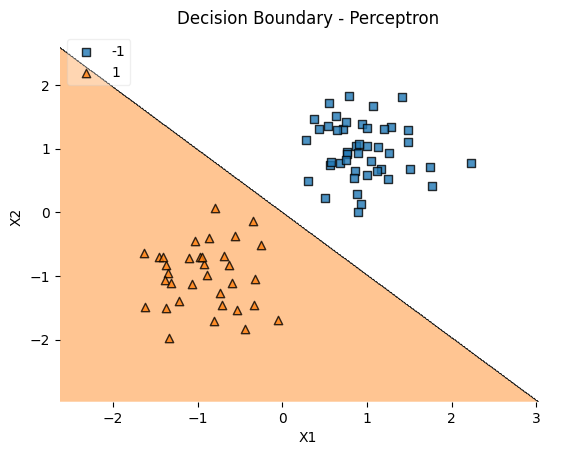

In [ ]:
from mlxtend.plotting import plot_decision_regions



# Plotting decision boundary
plot_decision_regions(X_test.values, y_test.values.astype(np.int), clf=clf, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary - Perceptron')
plt.show()

رسم با scatter

(273, 273)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


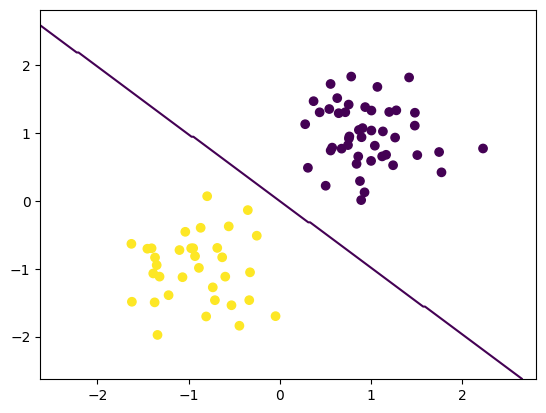

In [ ]:
X_test_array = X_test.values
x1_min, x2_min = X_test_array[:, 0].min()-1, X_test_array[:, 0].min()-1
x1_max, x2_max = X_test_array[:, 1].max()+1, X_test_array[:, 1].max()+1

x1m, x2m = np.meshgrid(np.arange(x1_min, x1_max,0.02),
                     np.arange(x2_min, x2_max, 0.02))
xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
print(x1m.shape)
ym=clf.predict(xm)



plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test)
plt.contour(x1m, x2m, ym.reshape(x1m.shape),levels=[0])
plt.show()

In [ ]:
clf1 = Perceptron(random_state=23, tol=0.001, max_iter=1000, eta0=0.1, verbose=0, n_jobs=-1)
clf1.fit(X_train, y_train)

Perceptron(eta0=0.1, n_jobs=-1, random_state=23)

In [ ]:
test_accuracy_1 = clf1.score(X_test, y_test)
test_accuracy_1

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


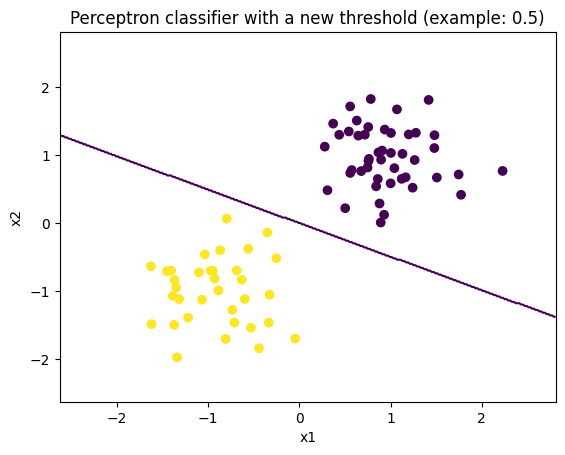

In [ ]:
ym2 = clf1.predict(xm)

plt.contour(x1m, x2m, ym2.reshape(x1m.shape), levels=[0])
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron classifier with a new threshold (example: 0.5)')
plt.show()

In [ ]:
perceptron_model_without_bias = Perceptron(fit_intercept=False, random_state=23, tol=0.001, max_iter=1000, eta0=0.1, verbose=0, n_jobs=-1)
perceptron_model_without_bias.fit(X_train, y_train)

Perceptron(eta0=0.1, fit_intercept=False, n_jobs=-1, random_state=42)

In [ ]:
test_accuracy_2 = perceptron_model_without_bias.score(X_test, y_test)
test_accuracy_2

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


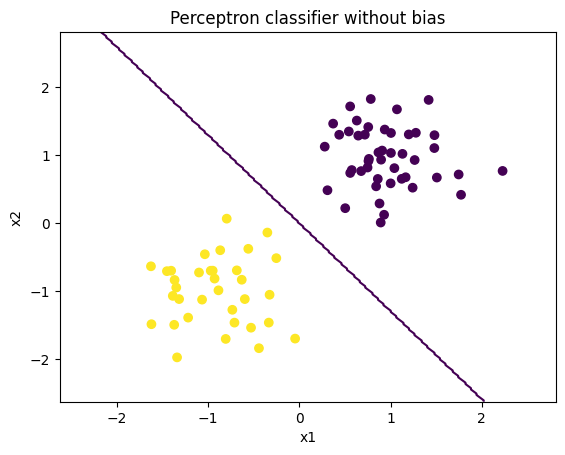

In [ ]:
ym3 = perceptron_model_without_bias.predict(xm)


plt.contour(x1m, x2m, ym3.reshape(x1m.shape), levels=[0])
plt.scatter(X_test_array[:, 0], X_test_array[:, 1], c=y_test)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron classifier without bias')
plt.show()